# Data Science Salary
Source: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries \
The purpose of this code is to **predict the data science salary value**

**work_year**: The year the salary was paid. \
**experience_level**: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director \
**employment_type**: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance \
**job_title**: The role worked in during the year.\
**salary**: The total gross salary amount paid. \
**salary_currency**: The currency of the salary paid as an ISO 4217 currency code. \
**salaryinusd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). \
**employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code. \
**remote_ratio**: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) \
**company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code. \
**company_size**: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [2]:
# Read dataframe from CSV
df = pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Cleaning The Dataset

In [3]:
# Check data type
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [4]:
# Check the number of NaN data from each column
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no NaN data that needs to be cleaned.

In [5]:
# Remove 'Unnamed: 0' column
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


I only use the salaries that have been converted to USD currency. 'Salary' column will be deleted

In [6]:
# Remove 'salary' column
df=df.drop(['salary'],axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [7]:
# Check remote ratio data
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

Change remote ratio data from int to string so we could categorize it easily

In [8]:
# Replace remote ratio data
df['remote_ratio'] = df['remote_ratio'].replace(0,'No Remote')
df['remote_ratio'] = df['remote_ratio'].replace(50,'Partial Remote')
df['remote_ratio'] = df['remote_ratio'].replace(100,'Full Remote')

In [9]:
# Check
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,No Remote,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,No Remote,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,Partial Remote,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,No Remote,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,Partial Remote,US,L


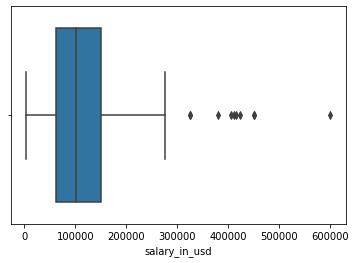

In [10]:
# Detect outliers at train data with boxplot
sns.boxplot(df['salary_in_usd'])

# Exploratory Data Analysis (EDA)

In [11]:
# Check dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,No Remote,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,No Remote,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,Partial Remote,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,No Remote,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,Partial Remote,US,L


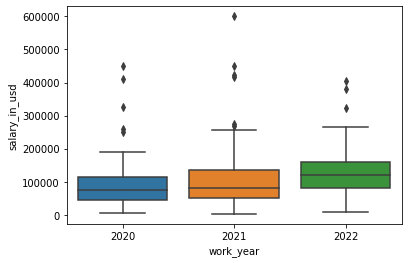

In [12]:
# create boxplot chart between work year and salary
sns.boxplot(x=df['work_year'], y=df['salary_in_usd'], data=df) 

Salary tends to increase every year.

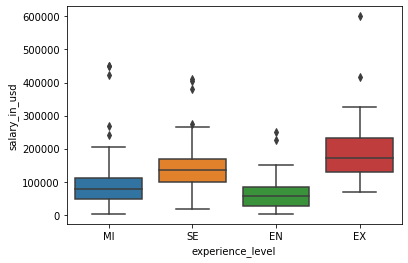

In [13]:
# create boxplot chart between experience and salary
sns.boxplot(x=df['experience_level'], y=df['salary_in_usd'], data=df) 

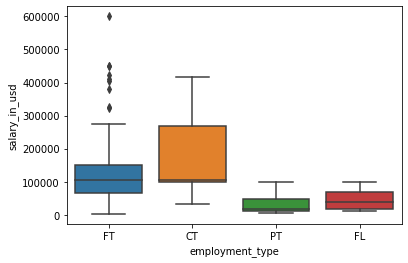

In [14]:
# create boxplot chart between employment type and salary
sns.boxplot(x=df['employment_type'], y=df['salary_in_usd'], data=df) 

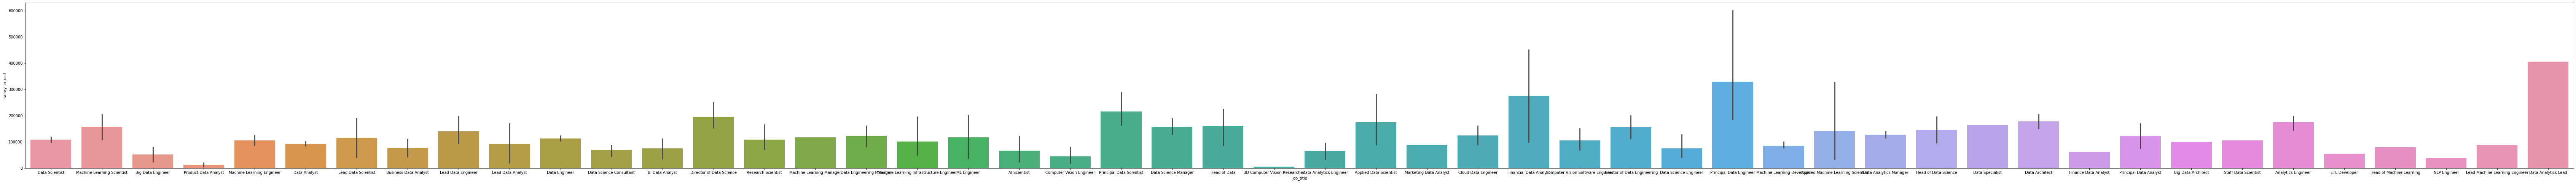

In [15]:
# create boxplot chart between job title and salary
plt.figure(figsize=(120,8))
ax = sns.barplot(x="job_title", y="salary_in_usd", data=df)

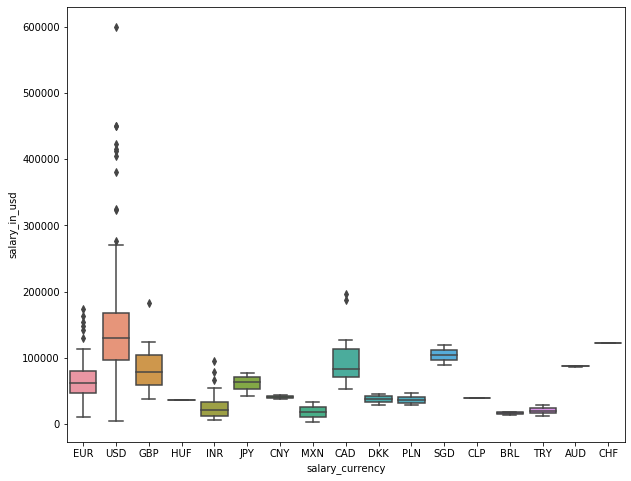

In [16]:
# create boxplot chart between currency and salary
plt.figure(figsize=(10,8))
sns.boxplot(x=df['salary_currency'], y=df['salary_in_usd'], data=df) 

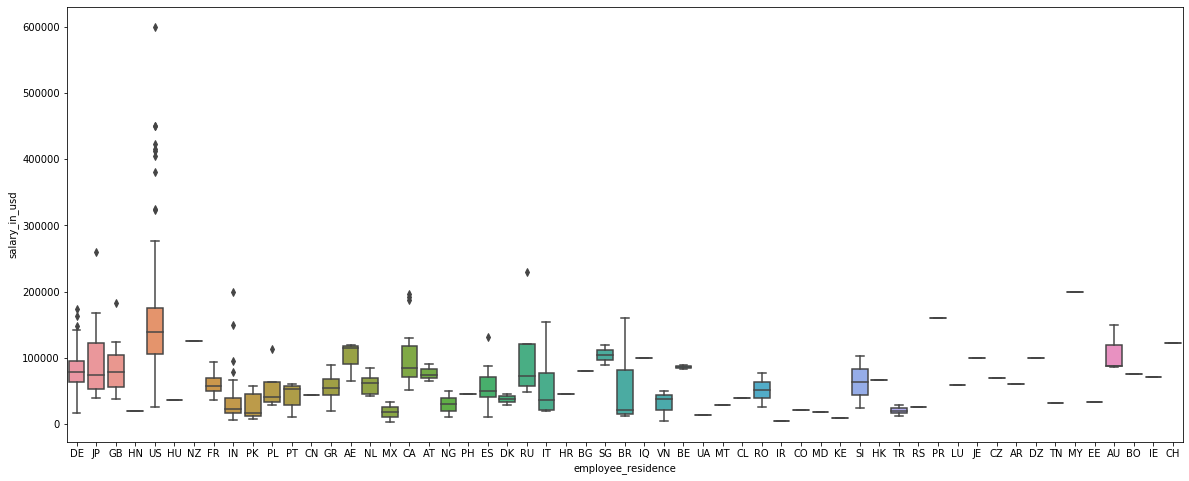

In [17]:
# create boxplot chart between employee residence and salary
plt.figure(figsize=(20,8))
sns.boxplot(x=df['employee_residence'], y=df['salary_in_usd'], data=df) 

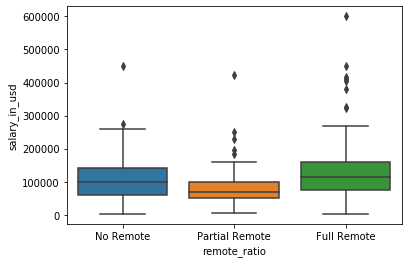

In [18]:
# create boxplot chart between remote ratio and salary
sns.boxplot(x=df['remote_ratio'], y=df['salary_in_usd'], data=df)

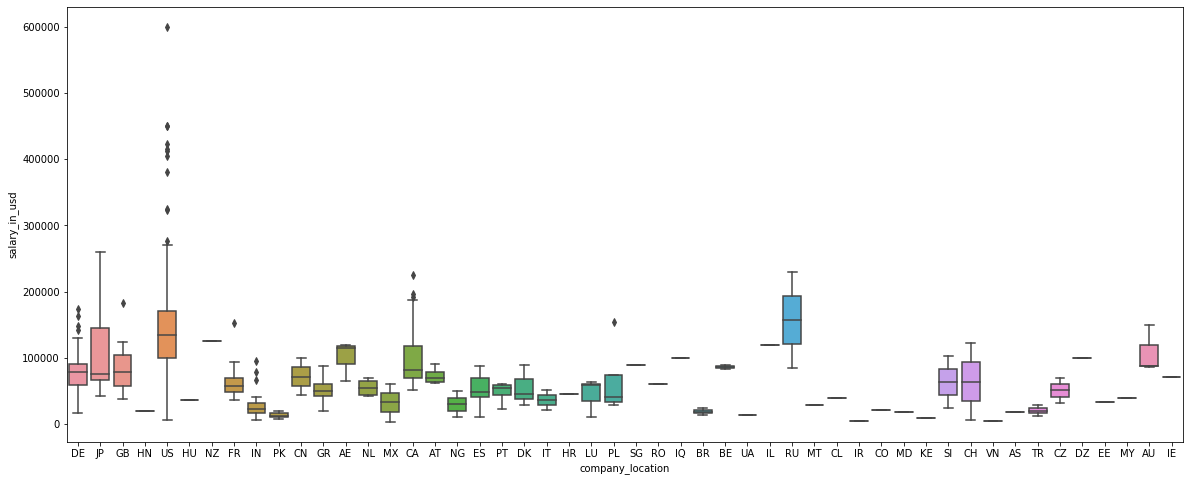

In [19]:
# create boxplot chart between company location and salary
plt.figure(figsize=(20,8))
sns.boxplot(x=df['company_location'], y=df['salary_in_usd'], data=df)

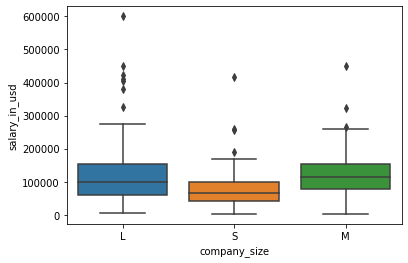

In [20]:
# create boxplot chart between company size and salary
sns.boxplot(x=df['company_size'], y=df['salary_in_usd'], data=df)

In [21]:
df['work_year'] = df['work_year'].astype(str)
dummies = pd.get_dummies(df)
dummies.head()

,salary_in_usd,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,79833,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,260000,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,109024,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20000,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,150000,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


# Separate Test Data and Clean Train Data

In [22]:
train = dummies.sample(frac=0.8, random_state=20)
test = dummies.drop(train.index)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 486
No. of testing examples: 121


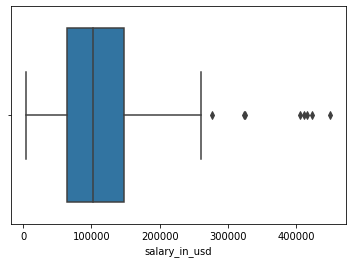

In [23]:
# Detect outliers at salary data with boxplot
sns.boxplot(train['salary_in_usd'])

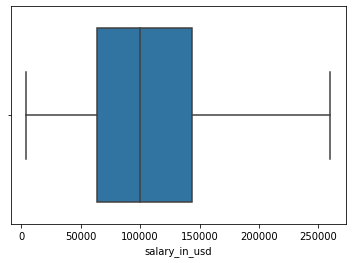

In [24]:
# Delete outliers
train=train[train['salary_in_usd']<270000]
sns.boxplot(train['salary_in_usd'])

# PCA

In [25]:
X_train = train.drop(['salary_in_usd'],axis=1)
y_train = train['salary_in_usd']
X_test = test.drop(['salary_in_usd'],axis=1)
y_test = test['salary_in_usd']

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(2)  # project from 175 to 2 dimensions
projected = pca.fit_transform(X_train)
print(X_train.shape)
print(projected.shape)

(478, 191)
(478, 2)


In [28]:
pca_df = pd.DataFrame(projected, columns = ['pc1', 'pc2'])
pca_df['salary'] = y_train.values
pca_df.head()

,pc1,pc2,salary
0,0.198414,-1.149654,200000
1,-1.364010,0.107946,106260
2,0.447432,1.736387,78526
3,-1.252814,0.045176,123000
4,-1.278253,0.048754,105400


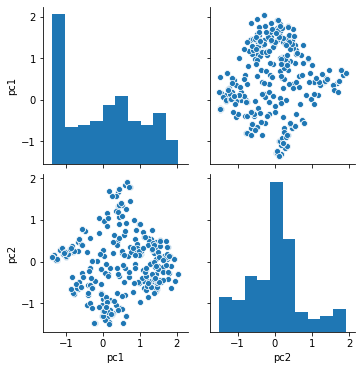

In [29]:
pcs = ['pc1', 'pc2']
sns.pairplot(data = pca_df, x_vars= pcs, y_vars = pcs)

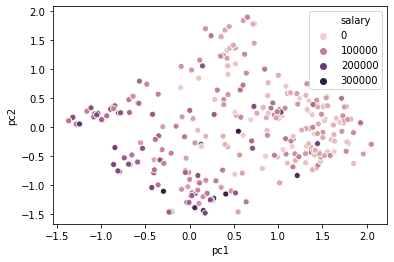

In [30]:
sns.scatterplot(data = pca_df, x = "pc1", y = "pc2", hue = "salary")

# Regression with PCA, Method: Random Forest Regression

In [31]:
X_train= projected
X_test= pca.fit_transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=9, n_jobs=-1, random_state=1)

In [33]:
from sklearn import metrics
def get_regression_metrics(model, actual, predicted):
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [34]:
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.757, R^2 test: 0.335


,Random Forest Regression
Root Mean Squared Error,68792.567232
Mean Absolute Error,44197.663609
R^2,0.334863
Explained Variance,0.364327


In [35]:
rf_pred_dict = {'Actual' : y_test,'Prediction' : y_test_predict}
rf_pred = pd.DataFrame.from_dict(rf_pred_dict).T
rf_pred

,6,12,41,42,43,51,55,60,65,68,...,552,558,574,583,585,586,592,597,603,605
Actual,190000.000000,39916.000000,79833.00000,50180.000000,106000.000000,91000.000000,148261.000000,110000.000000,62726.000000,105000.000000,...,176000.000000,205300.000000,210000.000000,160080.000000,110925.00000,45807.000000,230000.000000,170000.00000,126000.000000,150000.00000
Prediction,173463.328205,65502.449548,56167.65103,56724.518394,104586.763578,151687.364379,62138.082823,104586.763578,57095.563285,140427.105007,...,116811.793527,140594.799448,116811.793527,115574.316965,114820.94683,95004.706025,116811.793527,114820.94683,115574.316965,114820.94683


No handles with labels found to put in legend.


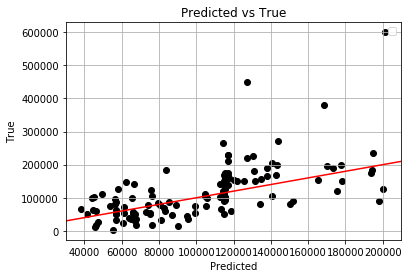

In [36]:
residuals = y_test - y_test_predict

## Plot predicted vs true
f, ax = plt.subplots()
from statsmodels.graphics.api import abline_plot
ax.scatter(y_test_predict, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red",ax=ax)
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()

In [37]:
mean_absolute_error(y_test_predict,y_test)

44197.66360898813

# Regression without PCA, Method: Random Forest Regression

In [38]:
X_train = train.drop(['salary_in_usd'],axis=1)
y_train = train['salary_in_usd']
X_test = test.drop(['salary_in_usd'],axis=1)
y_test = test['salary_in_usd']

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=9, n_jobs=-1, random_state=1)

In [40]:
from sklearn import metrics
def get_regression_metrics(model, actual, predicted):
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [41]:
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.440, R^2 test: 0.211


,Random Forest Regression
Root Mean Squared Error,74909.466002
Mean Absolute Error,46825.540907
R^2,0.211318
Explained Variance,0.230133


In [42]:
rf_pred_dict = {'Actual' : y_test,'Prediction' : y_test_predict}
rf_pred = pd.DataFrame.from_dict(rf_pred_dict).T
rf_pred

,6,12,41,42,43,51,55,60,65,68,...,552,558,574,583,585,586,592,597,603,605
Actual,190000.000000,39916.000000,79833.000000,50180.000000,106000.000000,91000.000000,148261.000000,110000.000000,62726.000000,105000.000000,...,176000.000000,205300.000000,210000.000000,160080.000000,110925.00000,45807.000000,230000.000000,170000.00000,126000.000000,150000.00000
Prediction,116761.385182,78523.504633,92059.272015,84657.980308,112095.415653,103373.124626,102986.064998,112095.415653,76445.706272,103775.958826,...,128037.205128,126559.299243,128037.205128,126986.869525,123840.78748,85245.928827,128037.205128,123840.78748,126986.869525,123840.78748


No handles with labels found to put in legend.


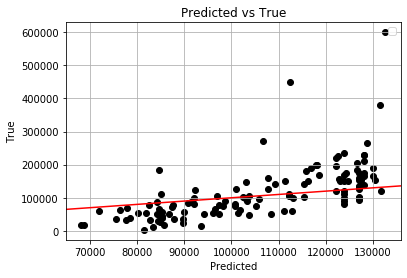

In [43]:
residuals = y_test - y_test_predict

## Plot predicted vs true
f, ax = plt.subplots()
from statsmodels.graphics.api import abline_plot
ax.scatter(y_test_predict, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red",ax=ax)
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()

In [44]:
mean_absolute_error(y_test_predict,y_test)

46825.540906564565

# Regression with PCA, Method: XGBoost

In [45]:
X_train= projected
X_test= pca.fit_transform(X_test)

In [46]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [47]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

xgb_metrics = get_regression_metrics('XGBoost', y_test, y_test_predict)
xgb_metrics

R^2 training: 0.849, R^2 test: 0.289


,XGBoost
Root Mean Squared Error,71139.888317
Mean Absolute Error,46905.772614
R^2,0.288697
Explained Variance,0.306458


In [48]:
xgb_pred_dict = {'Actual' : y_test,'Prediction' : y_test_predict}
xgb_pred = pd.DataFrame.from_dict(xgb_pred_dict).T
xgb_pred

,6,12,41,42,43,51,55,60,65,68,...,552,558,574,583,585,586,592,597,603,605
Actual,190000.000,39916.00000,79833.000000,50180.000000,106000.000000,91000.000000,148261.000000,110000.000000,62726.000000,105000.000000,...,176000.000000,205300.000000,210000.000000,160080.000,110925.000000,45807.000000,230000.000000,170000.000000,126000.000,150000.000000
Prediction,156647.875,88500.96875,60968.507812,22596.175781,123035.140625,155608.484375,35118.011719,123035.140625,53265.898438,137090.546875,...,129281.976562,125054.414062,129281.976562,113116.875,111948.101562,81037.179688,129281.976562,111948.101562,113116.875,111948.101562


No handles with labels found to put in legend.


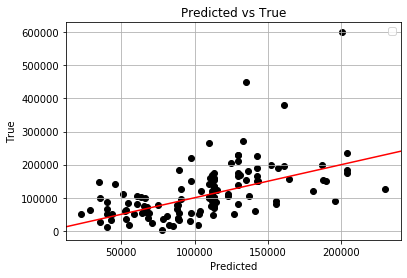

In [49]:
residuals = y_test - y_test_predict

## Plot predicted vs true
f, ax = plt.subplots()
from statsmodels.graphics.api import abline_plot
ax.scatter(y_test_predict, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red",ax=ax)
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()

In [50]:
mean_absolute_error(y_test_predict,y_test)

46905.772614282025

# Regression without PCA, Method: XGBoost

In [51]:
X_train = train.drop(['salary_in_usd'],axis=1)
y_train = train['salary_in_usd']
X_test = test.drop(['salary_in_usd'],axis=1)
y_test = test['salary_in_usd']

In [52]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [53]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

xgb_metrics = get_regression_metrics('XGBoost', y_test, y_test_predict)
xgb_metrics

R^2 training: 0.832, R^2 test: 0.482


,XGBoost
Root Mean Squared Error,60691.326356
Mean Absolute Error,36869.652198
R^2,0.482296
Explained Variance,0.494101


In [54]:
xgb_pred_dict = {'Actual' : y_test,'Prediction' : y_test_predict}
xgb_pred = pd.DataFrame.from_dict(xgb_pred_dict).T
xgb_pred

,6,12,41,42,43,51,55,60,65,68,...,552,558,574,583,585,586,592,597,603,605
Actual,190000.000000,39916.000000,79833.000000,50180.000000,106000.000000,91000.000000,148261.00000,110000.000000,62726.000000,105000.000000,...,176000.000000,205300.0000,210000.000000,160080.000000,110925.000000,45807.000000,230000.000000,170000.000000,126000.000000,150000.000000
Prediction,157910.703125,45195.132812,143416.546875,38264.640625,140221.546875,67636.554688,163050.03125,140221.546875,53240.019531,80964.242188,...,157563.984375,143243.0625,157563.984375,148499.984375,112379.992188,70548.828125,157563.984375,112379.992188,148499.984375,112379.992188


No handles with labels found to put in legend.


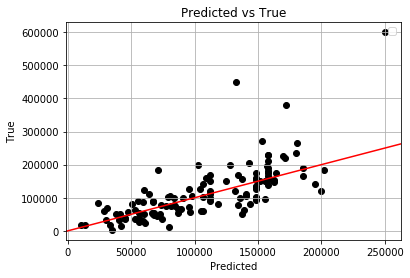

In [55]:
residuals = y_test - y_test_predict

## Plot predicted vs true
f, ax = plt.subplots()
from statsmodels.graphics.api import abline_plot
ax.scatter(y_test_predict, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red",ax=ax)
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()

In [56]:
mean_absolute_error(y_test_predict,y_test)

36869.65219847624